Import libraries

In [2]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt

# Halley Cubic Method

Consider the following function

$$f(x) = \cos{x} - x$$

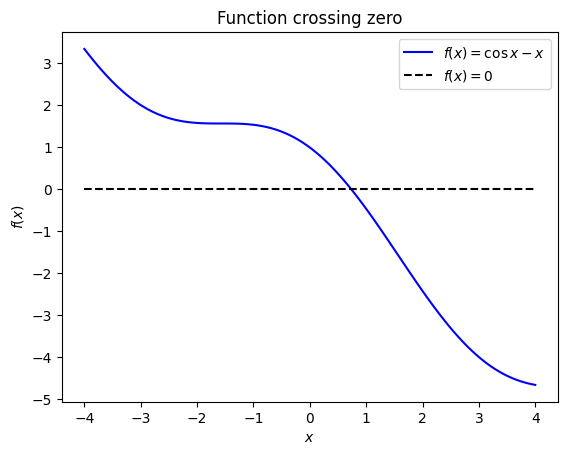

In [4]:
def f(x):
    return np.cos(x) - x

def df(x):
    return -np.sin(x) - 1

def ddf(x):
    return -np.cos(x)

x = np.linspace(-4,4,100)

plt.plot(x,f(x),'b-',label=r'$f(x) = \cos{x} - x$')
plt.plot(x,np.zeros_like(x),'k--',label=r'$f(x) = 0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title('Function crossing zero')
plt.legend()
plt.show()

Halley Cubic Algorithm

In [7]:
def halley(func,dFunc,ddFunc,x0,tol,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - dFunc: derivative function handle
    #   - ddFunc: 2nd derivative function handle
    #   - x0: initial guess
    #   - tol: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: root caculated by this method
    #   - iterations: array of iterations counted
    #   - errors: array of errors corresponding to each iteration
    #==================================================================

    print('*** HALLEY CUBIC METHOD ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the absolute error is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        xNew = x0 - 2*func(x0)*dFunc(x0) / (2*dFunc(x0)**2 - func(x0)*ddFunc(x0))
        x0 = xNew

        # compute new absolute error
        epsX = abs(func(xNew) / dFunc(xNew))

        # log iteration and error
        iterations.append(i)
        errors.append(epsX)
        
        # set new tolerance condition for the while loop to check
        condition = epsX > tol

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
    print(f'error: {func(xNew)}\n')
        
    return xNew, iterations, errors

Test the algorithm and plot it

*** HALLEY CUBIC METHOD ***
final x-value: 0.7390846966584201
iterations: 5
error: 7.306265419337876e-07



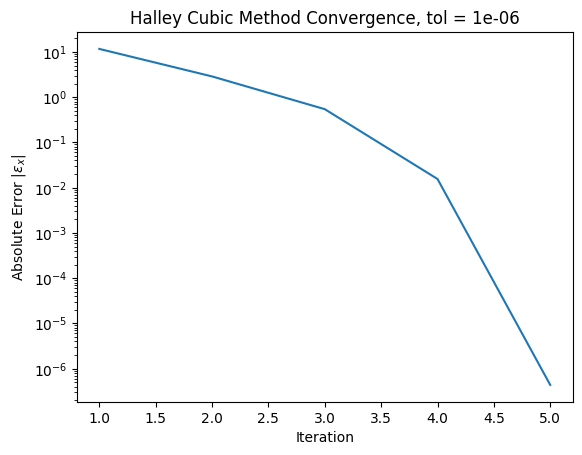

In [8]:
x0 = -4
tol = 1e-6

xNew1, iterations, errors = halley(f,df,ddf,x0,tol)

plt.semilogy(iterations,errors)
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Halley Cubic Method Convergence, tol = {tol}')
plt.show()

# Convergence

Use the equation below to compute the convergence rate of convergence for the Halley cubic method.

$$\alpha = \frac{\ln(e_{n+1}) - \ln{(e_{n})}}{\ln(e_{n}) - \ln{(e_{n-1}})}$$

In [9]:
def convergenceRate(errors):
    # array of errors

    e3 = errors[-1]
    e2 = errors[-2]
    e1 = errors[-3]

    num = np.log(e3) - np.log(e2)
    den = np.log(e2) - np.log(e1)

    return num/den

alpha = convergenceRate(errors)
print(f'Convergence Rate = {alpha}')

Convergence Rate = 2.9502786557390452


Use the equation below to calculate the error constant, $\lambda$.

$$\lambda = \frac{e_{n}}{e_{n-1}^{\alpha}} = \frac{e_{n+1}}{e_{n}^{\alpha}}$$

In [10]:
def errorConstant(errors,alpha):
    e2 = errors[-1]
    e1 = errors[-2]
    return e2 / e1**alpha

errConst = errorConstant(errors,alpha)
print(f'Error constant = {errConst}')

Error constant = 0.09403382287185989


# Aitken Acceleration

Fixed-point function

$$g(x) = cos(x)$$

In [11]:
def g(x):
    return np.cos(x)

Aitken Linear Acceleration Algorithm

In [14]:
def aitken(gFunc,x0,tol,maxIter=1e5):
    #==================================================================
    # INPUTS
    #   - func: function handle
    #   - dFunc: derivative function handle
    #   - ddFunc: 2nd derivative function handle
    #   - x0: initial guess
    #   - tol: tolerance
    #   - maxIter: maximum number of iterations before quitting
    # OUTPUTS
    #   - xNew: root caculated by this method
    #   - iterations: array of iterations counted
    #   - errors: array of errors corresponding to each iteration
    #==================================================================

    print('*** AITKEN METHOD ***')
    
    # declare variables
    i = 1
    iterations = []
    errors = []

    # initialize check condition as True to start the loop
    condition = True

    # loop as long as the absolute error is greater than the tolerance
    while condition:
        # force while loop to stop after a certain amount of iterations
        if i > maxIter:
            print(f'ERROR: Not Convergent within {maxIter} iterations')
            break
        
        x1 = gFunc(x0)
        x2 = gFunc(x1)
        xNew = x0 - (x1-x0)**2 / (x2 - 2*x1 + x0)
        x0 = xNew

        # compute new absolute error
        err = abs(xNew - x2)

        # log iteration and error
        iterations.append(i)
        errors.append(err)
        
        # set new tolerance condition for the while loop to check
        condition = err > tol

        # increment iterator
        i += 1

    print(f'final x-value: {xNew}')
    print(f'iterations: {i-1}')
        
    return xNew, iterations, errors

Test the algorithm and plot it

*** AITKEN METHOD ***
final x-value: 0.7390851332151607
iterations: 4


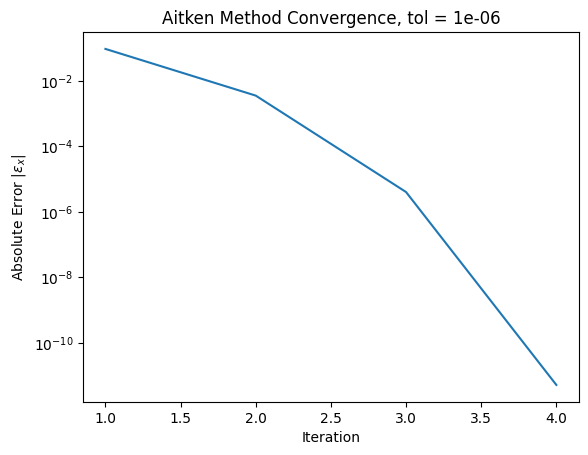

In [15]:
x0 = 0.5
tol = 1e-6

xNew, iterations, errors = aitken(g,x0,tol)

plt.semilogy(iterations,errors)
plt.xlabel('Iteration')
plt.ylabel(r'Absolute Error $|\epsilon_x|$')
plt.title(f'Aitken Method Convergence, tol = {tol}')
plt.show()

In [16]:
alpha = convergenceRate(errors)
print(f'convergence rate = {alpha}')

convergence rate = 2.0007316140082447


# Linear Error Propagation

Consider the function

$$z(x,y) = 3x^{2} - xy^{2} + 10$$

where the inputs $x$ and $y$ have the following expected values and standard deviations

$$\begin{bmatrix}
    \mu_{x} \\
    \mu_{y}
\end{bmatrix}
=
\begin{bmatrix}
    2 \\
    3
\end{bmatrix}$$

$$\begin{bmatrix}
    \sigma_{x} \\
    \sigma_{y}
\end{bmatrix}
=
\begin{bmatrix}
    0.02 \\
    0.01
\end{bmatrix}$$

In [17]:
def z(x,y):
    return 3*x**2 - x*y**2 + 10

muX = 2
muY = 3

sigX = 0.02
sigY = 0.01

Write functions to compute partial derivatives and to propgate the error

In [18]:
def dzdx(x,y):
    return 6*x - y**2

def dzdy(x,y):
    return -2*x*y

def propagate_error(dzdx,dzdy,muX,muY,sigX,sigY):
    return np.sqrt((dzdx(muX,muY)*sigX)**2 + (dzdy(muX,muY)*sigY)**2)

Compute new mean and standard deviation

In [19]:
muZ = z(muX,muY)
sigZ = propagate_error(dzdx,dzdy,muX,muY,sigX,sigY)

print(f'Mean of z(x): {muZ}')
print(f'Standard deviation of z(x): {sigZ}')

Mean of z(x): 4
Standard deviation of z(x): 0.1341640786499874


# Linear Algebra and Matrix Properties

## Vector Properties and Operations

Given the vectors

$a = \begin{bmatrix} 2 \\ 3 \\ 5 \end{bmatrix}, ~~~ b = \begin{bmatrix} 6 \\ 1 \\ -2 \end{bmatrix}$

compute some simple vector operations

In [20]:
a = np.array([2, 3, 5])
b = np.array([6, 1, -2])

Addition/subtraction and scalar multiplication

In [22]:
# addition/subtraction
print(f'a + b = {a+b}')
print(f'a - b = \n')

# scalar multiplication
print(f' 3a = {3*a}')
print(f'-2b = ')

a + b = [8 4 3]
a - b = 

 3a = [ 6  9 15]
-2b = 


Vector length (Euclidean norm) and units vector

In [25]:
def vecLen(vec):
    n = vec.shape[0]
    sum = 0
    for i in range(n):
        sum += vec[i]**2

    return np.sqrt(sum)

print(f'Length of a: {vecLen(a)}')
print(f'Length of b: \n')

print(f'Unit vector of a: {a / vecLen(a)}')
print(f'Unit vector of b: ')

Length of a: 6.164414002968976
Length of b: 

Unit vector of a: [0.32444284 0.48666426 0.81110711]
Unit vector of b: 


Dot (inner) product, cross product, and outer product

In [28]:
# dot (inner) product
print(f'dot(a,b) = {np.inner(a,b)}\n')

# cross product
print(f'cross(a,b) = {np.cross(a,b)}\n')

# outer product
print(f'outer(a,b) = \n{np.outer(a,b)}\n')

dot(a,b) = 5

cross(a,b) = [-11  34 -16]

outer(a,b) = 
[[ 12   2  -4]
 [ 18   3  -6]
 [ 30   5 -10]]



## Matrix Properties and Operations

Given the matrices

$A = \begin{bmatrix} 2 & 1 & -1 \\ 3 & 2 & 2 \\ 5 & -3 & 0 \end{bmatrix}, ~~~ B = \begin{bmatrix} 6 & 0 & -2 \\ 1 & 4 & 3 \\ -2 & 1 & 1 \end{bmatrix}$

compute some simple matrix operations

In [29]:
A = np.array([[2,  1, -1],
              [3,  2,  2],
              [5, -3,  0]])

B = np.array([[ 6, 0, -2],
              [ 1, 4,  3],
              [-2, 1,  1]])

Addition and multiplication

In [33]:
# addition
print(f'A + B = \n{A+B}\n')

# multiplication
print(f'AB = \n{np.matmul(A,B)}\n')
print(f'AB = \n{A@B}\n')

A + B = 
[[ 8  1 -3]
 [ 4  6  5]
 [ 3 -2  1]]

AB = 
[[ 15   3  -2]
 [ 16  10   2]
 [ 27 -12 -19]]

AB = 
[[ 15   3  -2]
 [ 16  10   2]
 [ 27 -12 -19]]



Transpose, inverse, trace, and determinant

In [38]:
# transpose
print(f'Transpose of A = \n{np.transpose(A)}')
print(f'Transpose of AB = \n')

# inverse
print(f'Inverse of A = \n{np.linalg.inv(A)}')
print(f'Inverse of A = \n{linalg.inv(A)}')
print(f'Inverse of AB = \n{linalg.inv(A@B)}\n')

# trace
print(f'tr(A) = {np.trace(A)}')
print(f'tr(AB) = ')
print(f'tr(BA) = \n')

# determinant
print(f'Determinant of A = {np.linalg.det(A)}')
print(f'Determinant of B = ')
print(f'Determinant of AB = ')

Transpose of A = 
[[ 2  3  5]
 [ 1  2 -3]
 [-1  2  0]]
Transpose of AB = 

Inverse of A = 
[[ 0.14634146  0.07317073  0.09756098]
 [ 0.24390244  0.12195122 -0.17073171]
 [-0.46341463  0.26829268  0.02439024]]
Inverse of A = 
[[ 0.14634146  0.07317073  0.09756098]
 [ 0.24390244  0.12195122 -0.17073171]
 [-0.46341463  0.26829268  0.02439024]]
Inverse of AB = 
[[ 0.33739837 -0.16463415 -0.05284553]
 [-0.72764228  0.4695122   0.12601626]
 [ 0.93902439 -0.5304878  -0.20731707]]

tr(A) = 4
tr(AB) = 
tr(BA) = 

Determinant of A = 40.999999999999986
Determinant of B = 
Determinant of AB = 
